In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [58]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


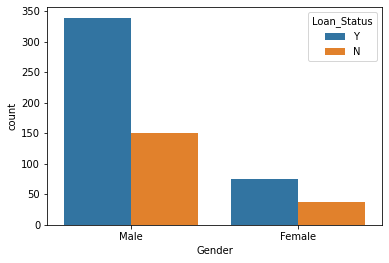

In [5]:
sns.countplot(df["Gender"],hue=df["Loan_Status"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


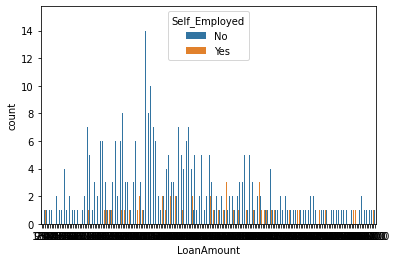

In [7]:
sns.countplot(df["LoanAmount"],hue=df["Self_Employed"])

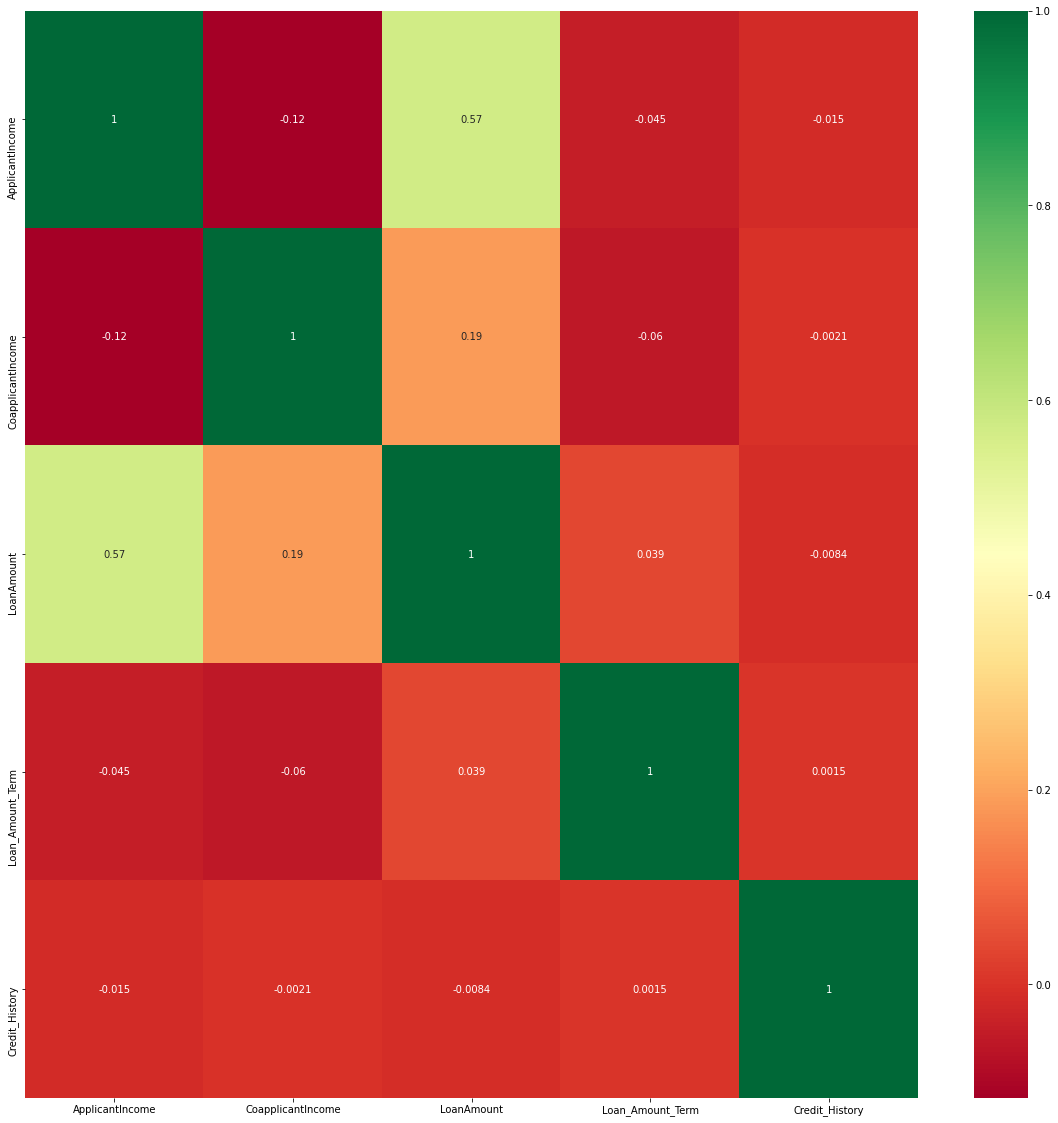

In [8]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df["Gender"]=df["Gender"].fillna(df["Gender"].value_counts().index[0])

In [18]:
df["Married"]=df["Married"].fillna(df["Married"].value_counts().index[0])

In [19]:
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].value_counts().index[0])

In [20]:
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].value_counts().index[0])

In [21]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [24]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())

In [25]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].median())

In [29]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [27]:
Gender=pd.get_dummies(df["Gender"],drop_first=True)

In [28]:
Married=pd.get_dummies(df["Married"],drop_first=True)

In [31]:
Education=pd.get_dummies(df["Education"],drop_first=True)

In [32]:
SelfEmployed=pd.get_dummies(df["Self_Employed"],drop_first=True)

In [33]:
Property=pd.get_dummies(df["Property_Area"],drop_first=True)

In [34]:
df.drop(columns=["Gender","Married","Education","Self_Employed","Property_Area"],inplace=True)

In [36]:
df=pd.concat([Gender,Married,Education,SelfEmployed,Property,df],axis=1)

In [37]:
df

,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,1,LP001002,0,5849,0.0,146.412162,360.0,1.0,Y
1,1,1,0,0,0,0,LP001003,1,4583,1508.0,128.000000,360.0,1.0,N
2,1,1,0,1,0,1,LP001005,0,3000,0.0,66.000000,360.0,1.0,Y
3,1,1,1,0,0,1,LP001006,0,2583,2358.0,120.000000,360.0,1.0,Y
4,1,0,0,0,0,1,LP001008,0,6000,0.0,141.000000,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,LP002978,0,2900,0.0,71.000000,360.0,1.0,Y
610,1,1,0,0,0,0,LP002979,3+,4106,0.0,40.000000,180.0,1.0,Y
611,1,1,0,0,0,1,LP002983,1,8072,240.0,253.000000,360.0,1.0,Y
612,1,1,0,0,0,1,LP002984,2,7583,0.0,187.000000,360.0,1.0,Y


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()

In [40]:
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])

In [41]:
df

,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,1,LP001002,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,0,0,0,0,LP001003,1,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,0,1,LP001005,0,3000,0.0,66.000000,360.0,1.0,1
3,1,1,1,0,0,1,LP001006,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,0,0,1,LP001008,0,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,LP002978,0,2900,0.0,71.000000,360.0,1.0,1
610,1,1,0,0,0,0,LP002979,3+,4106,0.0,40.000000,180.0,1.0,1
611,1,1,0,0,0,1,LP002983,1,8072,240.0,253.000000,360.0,1.0,1
612,1,1,0,0,0,1,LP002984,2,7583,0.0,187.000000,360.0,1.0,1


In [42]:
df["Dependents"]=le.fit_transform(df["Dependents"])

In [43]:
df

,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,1,LP001002,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,0,0,0,0,LP001003,1,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,0,1,LP001005,0,3000,0.0,66.000000,360.0,1.0,1
3,1,1,1,0,0,1,LP001006,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,0,0,1,LP001008,0,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,LP002978,0,2900,0.0,71.000000,360.0,1.0,1
610,1,1,0,0,0,0,LP002979,3,4106,0.0,40.000000,180.0,1.0,1
611,1,1,0,0,0,1,LP002983,1,8072,240.0,253.000000,360.0,1.0,1
612,1,1,0,0,0,1,LP002984,2,7583,0.0,187.000000,360.0,1.0,1


In [44]:
y=df["Loan_Status"]

In [45]:
df.drop(columns=["Loan_ID","Loan_Status"],inplace=True)

In [46]:
X=df

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model=LogisticRegression()

In [51]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_pred=model.predict(X_test)

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(y_test,y_pred)

-0.04358974358974366

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test,y_pred)

0.7621621621621621

In [69]:
submission1=pd.DataFrame(y_pred)

In [68]:
submission.columns

Int64Index([0], dtype='int64')

In [72]:
submission1[0].replace({1: "Y", 0: "N"}, inplace=True)

In [81]:
y_pred


0      Y
1      Y
2      Y
3      Y
4      Y
      ..
180    Y
181    Y
182    Y
183    Y
184    N
Name: 0, Length: 185, dtype: object

In [82]:
submission=pd.DataFrame({"Loan_ID":df["Loan_ID"],"Loan_Status":y_pred})

In [83]:
submission.to_csv("Submission.csv")
